<a href="https://colab.research.google.com/github/mainarel/-Numerical_methods/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

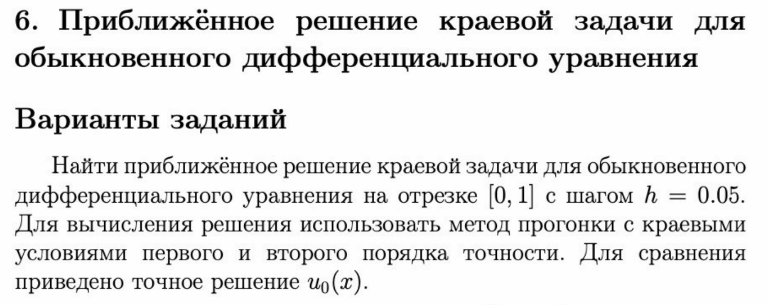
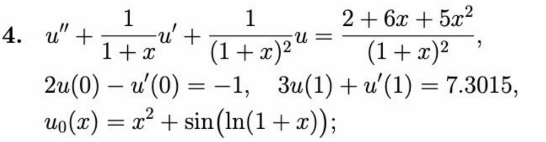

Представление уравнения в виде:
* y'' + p(x)y' + q(x)y = f(x)
* a1 * y(0) + b1 * y'(0) = g1
* a2 * y(1) + b2 * y'(1) = g2


In [39]:
import numpy as np
from matplotlib import pyplot as plt


def p(x):
  return 1/(1+x)

def q(x):
  return 1/((1+x)**2)

def F(x):
  return (2+6*x+5*(x**2))/((1+x)**2)

def equation(x,u,u1):
  return -p(x)*u1 - q(x)*u + F(x)

a1, b1, g1 = 2, -1, -1
a2, b2, g2 = 3, 1, 7.3015

def solution(x):
  return x**2 + np.sin(np.log(1+x))

a, b = 0, 1
koef_arr = [a1, b1, g1, a2, b2, g2]
h = 0.05
xrange = np.arange(a, b+h, h)
yrange = solution(xrange)



In [40]:
def difference_approach_1(xn, p, q, F, koef_arr):

    a1 = koef_arr[0]
    b1 = koef_arr[1]
    g1 = koef_arr[2]
    a2 = koef_arr[3]
    b2 = koef_arr[4]
    g2 = koef_arr[5]

    a = np.zeros(len(xn))
    b = np.zeros(len(xn))
    c = np.zeros(len(xn))
    f = np.zeros(len(xn))
    h = xn[3] - xn[2] 

    a[0] = 0
    b[0] = a1 - b1/h
    c[0] = b1/h
    f[0] = g1
    a[-1] = -1*b2/h
    b[-1] = a2 + b2/h
    c[-1] = 0
    f[-1] = g2

    for i in range(1, len(xn)-1):
        a[i] = 1/(h**2) - p(xn[i]) / (2*h)
    for i in range(1, len(xn)-1):
        b[i] = -2/(h**2) + q(xn[i])
    for i in range(1, len(xn)-1):
        c[i] = 1/(h**2) + p(xn[i]) / (2*h)
    for i in range(1, len(xn)-1):
        f[i] = F(xn[i])

    return progonka(a,b,c,f)

def progonka(a, b, c, f):
    A = np.zeros(len(a))
    B = np.zeros(len(a))

    A[0] = -c[0] / b[0]
    B[0] = f[0] / b[0]

    for i in range(1, len(a)-1):
        A[i] = -c[i] / (b[i] + a[i]*A[i-1])
    for i in range(1, len(a)-1):
        B[i] = (f[i] - a[i]*B[i-1]) / (b[i] + a[i]*A[i-1])

    A[-1] = 0
    B[-1] = (f[-1] - a[-1]*B[-2]) / (b[-1] + a[-1]*A[-2])

#обратный ход
    y = np.zeros(len(a))
    y[-1] = B[-1]
    for i in range(len(a)-2, -1, -1):
        y[i] = B[i] + A[i]*y[i+1]

    return y

def difference_approach_2(xn, p, q, F, koeff_arr):
    a1 = koeff_arr[0]
    b1 = koeff_arr[1]
    g1 = koeff_arr[2]
    a2 = koeff_arr[3]
    b2 = koeff_arr[4]
    g2 = koeff_arr[5]

    a = np.zeros(len(xn))
    b = np.zeros(len(xn))
    c = np.zeros(len(xn))
    f = np.zeros(len(xn))
    h = xn[3] - xn[2] 

    a[0] = 0
    b[0] = -2 + (2*a1*h / b1) - (p(xn[0])*a1*(h**2) / b1) + q(xn[0])*(h**2)
    c[0] = 2
    f[0] = F(xn[0])*(h**2) + ((g1*2*h) / b1) - (p(xn[0])*g1*(h**2) / b1)
    a[-1] = 2
    b[-1] = -2 - (2*h*a2 / b2) - (p(xn[-1])*(h**2)*a2 / b2) + (q(xn[-1])*(h**2))
    c[-1] = 0
    f[-1] = F(xn[-1])*(h**2) - ((h**2)*p(xn[-1])*g2 / b2) - (2*h*g2/b2)

    for i in range(1, len(xn) - 1):
        a[i] = 1/(h**2) - p(xn[i]) / (2*h)
    for i in range(1, len(xn) - 1):
        b[i] = -2/(h**2) + q(xn[i])
    for i in range(1, len(xn) - 1):
        c[i] = 1/(h**2) + p(xn[i]) / (2*h)
    for i in range(1, len(xn) - 1):
        f[i] = F(xn[i]) 

    return progonka(a,b,c,f)

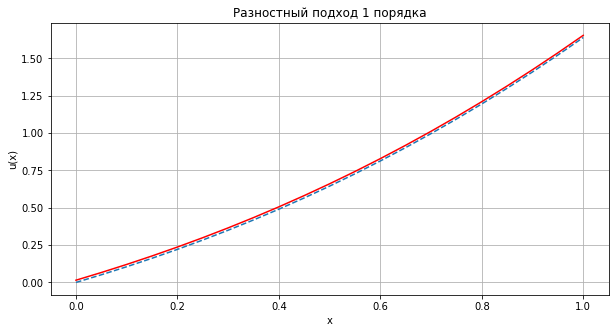

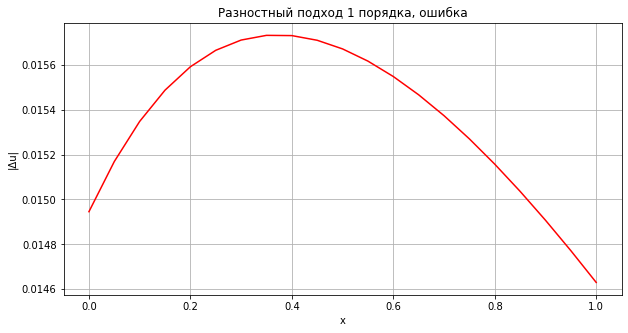

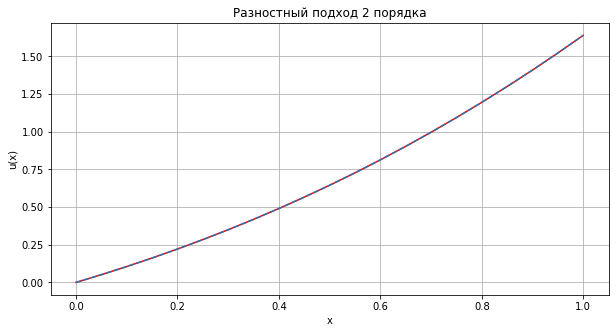

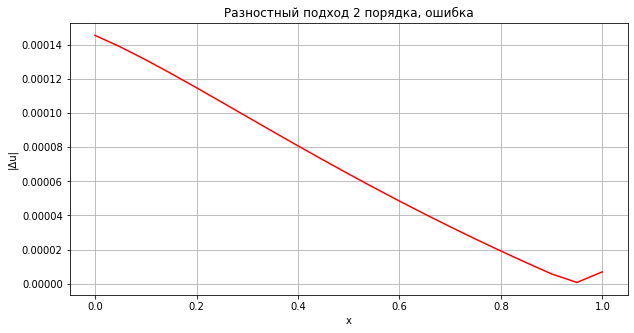

In [41]:
plt.figure(figsize=(10,5))
plt.title("Разностный подход 1 порядка")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.plot(xrange, difference_approach_1(xrange, p, q, F, koef_arr), color='red')
plt.plot(xrange, yrange, linestyle="--")

plt.figure(figsize=(10,5))
plt.title("Разностный подход 1 порядка, ошибка")
plt.xlabel("x")
plt.ylabel("|Δu|")
plt.grid()
plt.plot(xrange, [abs(difference_approach_1(xrange, p, q, F, koef_arr)[i] - yrange[i]) for i in range(len(xrange))], color='red')


plt.figure(figsize=(10,5))
plt.title("Разностный подход 2 порядка")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.plot(xrange, difference_approach_2(xrange, p, q, F, koef_arr), color='red')
plt.plot(xrange, yrange, linestyle="--")

plt.figure(figsize=(10,5))
plt.title("Разностный подход 2 порядка, ошибка")
plt.xlabel("x")
plt.ylabel("|Δu|")
plt.grid()
plt.plot(xrange, [abs(difference_approach_2(xrange, p, q, F, koef_arr)[i] - yrange[i]) for i in range(len(xrange))], color='red')

0.9837685238325778
1.751448835151497


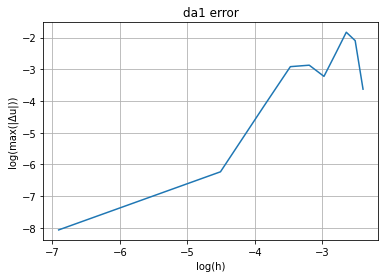

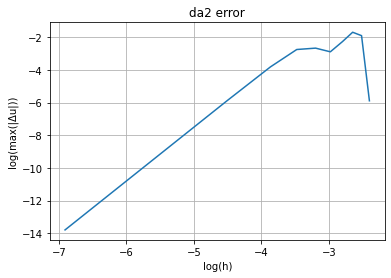

In [46]:
import math


hmin = 0.001
hmax = 0.1
hstep = 0.01
hrange = np.arange(hmin,hmax,hstep)

da1_error = []
da2_error = []
h_log = []

def difference(true, result):
    dfr = [abs(true[i] - result[i]) for i in range(len(true))]
    return math.log(max(dfr))

for i in range(len(hrange)):
    hi = hrange[i]
    h_log.append(math.log(hi))
    xrangeh = np.arange(a,b+hi,hi)
    yrangeh = solution (xrangeh)
    da1_error.append( difference(difference_approach_1(xrangeh, p, q, F, koef_arr),yrangeh))
    da2_error.append (difference(difference_approach_2(xrangeh, p, q, F, koef_arr) ,yrangeh))

plt.figure(1)
plt.title("da1 error")
plt.xlabel("log(h)")
plt.ylabel("log(max(|Δu|))")
plt.grid()
plt.plot(h_log,da1_error )
gradient = (da1_error[-1] - da1_error[0]) / (h_log[-1] - h_log[0])
print (gradient)

plt.figure(2)
plt.title("da2 error")
plt.xlabel("log(h)")
plt.ylabel("log(max(|Δu|))")
plt.grid()
plt.plot(h_log,da2_error )
gradient = (da2_error[-1] - da2_error[0]) / (h_log[-1] - h_log[0])
print (gradient)
